Import the appropriate libraries

In [484]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Import the CSV's and filter the dates. Exclude any completions outside training date.

In [452]:
dp = pd.read_csv('virgin_care.csv')

In [453]:
df = dp[dp.completed_by != 'parent_1']

<b>Summary Section</b><br>
Calculate N's for cases that have completed 2 timepoints for at least 1 measure

In [454]:
number_of_paired_cases = df.shape[0]
print('Number of cases with paired outcomes:', number_of_paired_cases)

Number of cases with paired outcomes: 46


<b>Anxiety and Depression</b><br>
Calculate N's for RCADS completions with time 2 completions (paired)<br>
Calculate T1 T-Score averages for GAD, MDD, Panic and SP<br>
Calculate T2 T-Score averages for GAD, MDD, Panic and SP<br>
Calculate differences between T1 and T2 T-Score averages for GAD, MDD, Panic and SP<br>
Calculate average change across GAD, MDD, Panic and SP<br>
Create bar chart to show T1 and T2 average T-Scores for GAD, MDD, Panic and SP<br>
Calculate T1 scores scoring above threshold for GAD, MDD, Panic and SP<br>
Calculate T2 scores scoring above thresold for GAD, MDD, Panic and SP<br>
Create bar chart to show T1 and T2 above threshold scores for GAD, MDD, Panic and SP

In [455]:
rcads_paired = df['rcads_date_t2'].count()
print('Number of cases with paired RCADS outcomes:', rcads_paired)

Number of cases with paired RCADS outcomes: 16


In [456]:
rcads_gad_t1 = np.round(df['rcads_tscore_gad_t1'].mean(),2)
rcads_mdd_t1 = np.round(df['rcads_tscore_mdd_t1'].mean(), 2)
rcads_pd_t1 = np.round(df['rcads_tscore_pd_t1'].mean(), 2)
rcads_sp_t1 = np.round(df['rcads_tscore_sp_t1'].mean(), 2)

In [457]:
print('GAD Average T-Score at T1:', rcads_gad_t1)
print('MDD Average T-Score at T1:', rcads_mdd_t1)
print('PD Average T-Score at T1', rcads_pd_t1)
print('SP Average T-Score at T1', rcads_sp_t1)

GAD Average T-Score at T1: 59.81
MDD Average T-Score at T1: 63.06
PD Average T-Score at T1 71.38
SP Average T-Score at T1 60.94


In [458]:
rcads_gad_t2 = np.round(df['rcads_tscore_gad_t2'].mean(),2)
rcads_mdd_t2 = np.round(df['rcads_tscore_mdd_t2'].mean(), 2)
rcads_pd_t2 = np.round(df['rcads_tscore_pd_t2'].mean(), 2)
rcads_sp_t2 = np.round(df['rcads_tscore_sp_t2'].mean(), 2)

In [459]:
print('GAD Average T-Score at T2:', rcads_gad_t2)
print('MDD Average T-Score at T2:', rcads_mdd_t2)
print('PD Average T-Score at T2', rcads_pd_t2)
print('SP Average T-Score at T2', rcads_sp_t2)

GAD Average T-Score at T2: 42.83
MDD Average T-Score at T2: 49.23
PD Average T-Score at T2 51.55
SP Average T-Score at T2 47.46


In [460]:
rcads_gad_avg_diff = np.round(rcads_gad_t1 - rcads_gad_t2)
rcads_mdd_avg_diff = np.round(rcads_mdd_t1 - rcads_mdd_t2)
rcads_pd_avg_diff = np.round(rcads_pd_t1 - rcads_pd_t2)
rcads_sp_avg_diff = np.round(rcads_sp_t1 - rcads_sp_t2)

In [461]:
print('GAD Average Difference:', rcads_gad_avg_diff)
print('MDD Average Difference:', rcads_mdd_avg_diff)
print('PD Average Difference', rcads_pd_avg_diff)
print('SP Average Difference', rcads_sp_avg_diff)

GAD Average Difference: 17.0
MDD Average Difference: 14.0
PD Average Difference 20.0
SP Average Difference 13.0


In [462]:
overall_avg_change = np.round((rcads_gad_avg_diff + rcads_mdd_avg_diff + rcads_pd_avg_diff + rcads_sp_avg_diff)/4)

In [463]:
print('Overall average change across subscales:', overall_avg_change)

Overall average change across subscales: 16.0


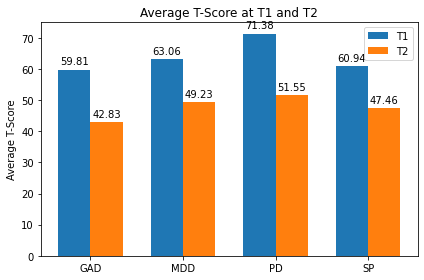

In [464]:
rcads_labels = ['GAD','MDD','PD','SP']
rcads_t1_means = [rcads_gad_t1, rcads_mdd_t1, rcads_pd_t1, rcads_sp_t1]
rcads_t2_means = [rcads_gad_t2, rcads_mdd_t2, rcads_pd_t2, rcads_sp_t2]

x = np.arange(len(rcads_labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rcads_t1_means, width, label='T1')
rects2 = ax.bar(x + width/2, rcads_t2_means, width, label='T2')

ax.set_ylabel('Average T-Score')
ax.set_title('Average T-Score at T1 and T2')
ax.set_xticks(x)
ax.set_xticklabels(rcads_labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x() + rect.get_width()/2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [465]:
rcads_gad_above_threshold_t1 = df[df.rcads_band_gad_t1 == 'High score (top 2%)'].shape[0]
rcads_mdd_above_threshold_t1 = df[df.rcads_band_mdd_t1 == 'High score (top 2%)'].shape[0]
rcads_pd_above_threshold_t1 = df[df.rcads_band_pd_t1 == 'High score (top 2%)'].shape[0]
rcads_sp_above_threshold_t1 = df[df.rcads_band_sp_t1 == 'High score (top 2%)'].shape[0]

In [466]:
print('GAD scores above threshold at T1:', rcads_gad_above_threshold_t1)
print('MDD scores above threshold at T1:', rcads_mdd_above_threshold_t1)
print('PD scores above threshold at T1:', rcads_pd_above_threshold_t1)
print('SP scores above threshold at T1:', rcads_sp_above_threshold_t1)

GAD scores above threshold at T1: 4
MDD scores above threshold at T1: 4
PD scores above threshold at T1: 9
SP scores above threshold at T1: 6


In [467]:
rcads_gad_above_threshold_t2 = df[df.rcads_band_gad_t2 == 'High score (top 2%)'].shape[0]
rcads_mdd_above_threshold_t2 = df[df.rcads_band_mdd_t2 == 'High score (top 2%)'].shape[0]
rcads_pd_above_threshold_t2 = df[df.rcads_band_pd_t2 == 'High score (top 2%)'].shape[0]
rcads_sp_above_threshold_t2 = df[df.rcads_band_sp_t2 == 'High score (top 2%)'].shape[0]

In [468]:
print('GAD scores above threshold at T2:', rcads_gad_above_threshold_t2)
print('MDD scores above threshold at T2:', rcads_mdd_above_threshold_t2)
print('PD scores above threshold at T2:', rcads_pd_above_threshold_t2)
print('SP scores above threshold at T2:', rcads_sp_above_threshold_t2)

GAD scores above threshold at T2: 0
MDD scores above threshold at T2: 0
PD scores above threshold at T2: 0
SP scores above threshold at T2: 2


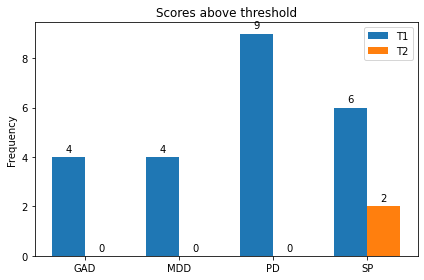

In [469]:
rcads_labels = ['GAD','MDD','PD','SP']
rcads_t1_thresholds = [rcads_gad_above_threshold_t1, rcads_mdd_above_threshold_t1, rcads_pd_above_threshold_t1, rcads_sp_above_threshold_t1]
rcads_t2_thresholds = [rcads_gad_above_threshold_t2, rcads_mdd_above_threshold_t2, rcads_pd_above_threshold_t2, rcads_sp_above_threshold_t2]

x = np.arange(len(rcads_labels))
width = 0.35

fig, ax = plt.subplots()
rectss1 = ax.bar(x - width/2, rcads_t1_thresholds, width, label='T1')
rectss2 = ax.bar(x + width/2, rcads_t2_thresholds, width, label='T2')

ax.set_ylabel('Frequency')
ax.set_title('Scores above threshold')
ax.set_xticks(x)
ax.set_xticklabels(rcads_labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x() + rect.get_width()/2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom')

autolabel(rectss1)
autolabel(rectss2)

fig.tight_layout()

plt.show()

<b>Behavioural Problems (SDQ)</b><br>
Calculate N's for SDQ completions with time 2 completions (paired)<br>
Calculate average SDQ total score for T1<br>
Calculate average SDQ total score for T2<br>
Calculate average change between SDQ total score avg for T1 and T2<br>
Calculate SDQ total scores above threshold for T1<br>
Calculate SDQ total scores above thresold for T2<br>
Calculate SDQ impact scores average (each impact) for T1<br>
Calculate SDQ impact scores average (each impact) for T2<br>
Create bar chart to show SDQ impact scores average (each impact) for T1 and T2

In [470]:
sdq_paired = df['sdq_date_t2'].count()
print('Number of cases with paired sdq outcomes:', sdq_paired)

Number of cases with paired sdq outcomes: 10


In [471]:
sdq_total_t1_avg = np.round(df['sdq_total_t1'].mean(), 2)
sdq_total_t2_avg = np.round(df['sdq_total_t2'].mean(), 2)
print('SDQ Total T1 average:', sdq_total_t1_avg)
print('SDQ Total T2 average:', sdq_total_t2_avg)

SDQ Total T1 average: 19.19
SDQ Total T2 average: 14.7


In [472]:
sdq_total_avg_change = np.round(sdq_total_t1_avg - sdq_total_t2_avg)
print('SDQ Total Average Change:', sdq_total_avg_change)

SDQ Total Average Change: 4.0


In [473]:
sdq_total_above_threshold_t1 = df[df.sdq_total_t1 > 17].shape[0]
sdq_total_above_threshold_t2 = df[df.sdq_total_t2 > 17].shape[0]
print('SDQ Total Scores above threshold (T1):',sdq_total_above_threshold_t1)
print('SDQ Total Scores above threshold (T2):',sdq_total_above_threshold_t2)

SDQ Total Scores above threshold (T1): 14
SDQ Total Scores above threshold (T2): 4


In [474]:
sdq_distress_t1 = np.round(df['sdq_impact_distress_t1'].mean(),2)
sdq_homelife_t1 = np.round(df['sdq_impact_homelife_t1'].mean(),2)
sdq_friendship_t1 = np.round(df['sdq_impact_friendship_t1'].mean(),2)
sdq_learning_t1 = np.round(df['sdq_impact_learning_t1'].mean(),2)
sdq_leisure_t1 = np.round(df['sdq_impact_leisure_t1'].mean(),2)

In [475]:
sdq_distress_t2 = np.round(df['sdq_impact_distress_t2'].mean(),2)
sdq_homelife_t2 = np.round(df['sdq_impact_homelife_t2'].mean(),2)
sdq_friendship_t2 = np.round(df['sdq_impact_friendship_t2'].mean(),2)
sdq_learning_t2 = np.round(df['sdq_impact_learning_t2'].mean(),2)
sdq_leisure_t2 = np.round(df['sdq_impact_leisure_t2'].mean(),2)

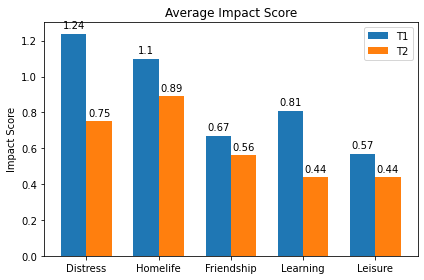

In [476]:
sdq_labels = ['Distress','Homelife','Friendship','Learning','Leisure']
sdq_t1_impacts = [sdq_distress_t1, sdq_homelife_t1, sdq_friendship_t1, sdq_learning_t1, sdq_leisure_t1]
sdq_t2_impacts = [sdq_distress_t2, sdq_homelife_t2, sdq_friendship_t2, sdq_learning_t2, sdq_leisure_t2]

x = np.arange(len(sdq_labels))
width = 0.35

fig, ax = plt.subplots()
rectsss1 = ax.bar(x - width/2, sdq_t1_impacts, width, label='T1')
rectsss2 = ax.bar(x + width/2, sdq_t2_impacts, width, label='T2')

ax.set_ylabel('Impact Score')
ax.set_title('Average Impact Score')
ax.set_xticks(x)
ax.set_xticklabels(sdq_labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x() + rect.get_width()/2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom')

autolabel(rectsss1)
autolabel(rectsss2)

fig.tight_layout()

plt.show()

<b>Goals Based Outcomes</b><br>
Calculate N's for GBO's that have time 2 completions (paired)<br>
Calculate average goal score for T1<br>
Calculate average goal score for T2<br>
Calculate difference in avg goal score for T1 and T2<br>
Create bar chart to show difference in avg goal score between T1 and T2

In [477]:
gbo_paired = df['goals_date_t2'].count()
print('Number of paired GBO completions:', gbo_paired)

Number of paired GBO completions: 26


In [478]:
g1_avg_t1 = df['goals_g1score_t1'].mean()
g2_avg_t1 = df['goals_g2score_t1'].mean()
g3_avg_t1 = df['goals_g3score_t1'].mean()
g1_avg_t2 = df['goals_g1score_t2'].mean()
g2_avg_t2 = df['goals_g2score_t2'].mean()
g3_avg_t2 = df['goals_g3score_t2'].mean()

gbo_avg_t1 = np.round((g1_avg_t1 + g2_avg_t1 + g3_avg_t1)/3,2)
gbo_avg_t2 = np.round((g1_avg_t2 + g2_avg_t2 + g3_avg_t2)/3,2)
gbo_avg_diff = np.round(gbo_avg_t2 - gbo_avg_t1,2)

print('GBO Average T1:', gbo_avg_t1)
print('GBO Average T2:', gbo_avg_t2)
print('GBO Average difference between T1 and T2:', gbo_avg_diff)

GBO Average T1: 2.95
GBO Average T2: 6.34
GBO Average difference between T1 and T2: 3.39


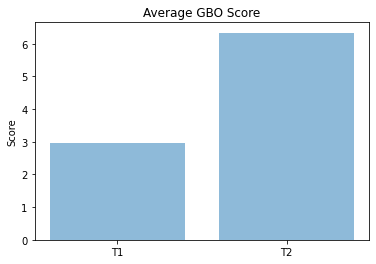

In [479]:
objects = ['T1','T2']
y_pos = np.arange(len(objects))
performance = [gbo_avg_t1, gbo_avg_t2]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Average GBO Score')

plt.show()

<b>Experience of Service</b><br>
Calculate N's for ESQ Parent<br>
Calculate N's for ESQ Self 12-18<br>
Calculate N's for ESQ Self 9-11<br>
Calculate N's for SRS<br>
Calculate average number of 'certainly true' responses for each ESQ<br>
Create bar graph to show average number of 'certainly true' responses for each ESQ<br>
Calculate average score for each subscales of the SRS<br>
Create a bar chart to show average score for each subcale of the SRS